In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
def show_orignal_images(pixels):
	#Displaying Orignal Images
	fig, axes = plt.subplots(6, 10, figsize=(11, 7),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(np.array(pixels)[i].reshape(64, 64), cmap='gray')
	plt.show()

def show_eigenfaces(pca):
	#Displaying Eigenfaces
	fig, axes = plt.subplots(3, 8, figsize=(9, 4),
	                         subplot_kw={'xticks':[], 'yticks':[]})
	for i, ax in enumerate(axes.flat):
	    ax.imshow(pca.components_[i].reshape(64, 64), cmap='gray')
	    ax.set_title("PC " + str(i+1))
	plt.show()


In [3]:
df=pd.read_csv('face_data.csv')
target=df['target']
pixels=df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(pixels,target,test_size=0.3, random_state=42)
X_train.shape


(280, 4096)

In [4]:
from sklearn.decomposition import PCA
pca=PCA(n_components=150,whiten=True)
pca.fit(pixels)
pixels_pca=pca.transform(pixels)

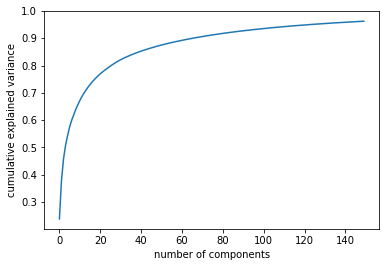

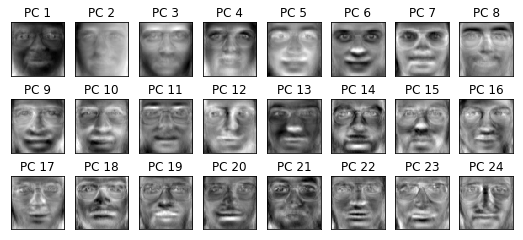

In [5]:
#n_comp= 150. You may use library.
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

#show_eigenfaces(pca)
show_eigenfaces(pca)

In [6]:

pca_xtrain=pca.fit(X_train)

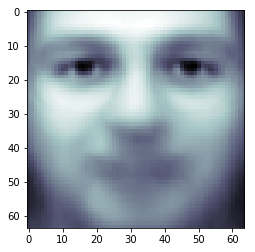

In [7]:
#meanface
plt.imshow(pca.mean_.reshape(64,64),cmap=plt.cm.bone)

In [8]:
n_components = 10

print("Extracting the top %d eigenfaces from %d faces"
      % (n_components, X_train.shape[0]))
pca = PCA(n_components=n_components,
          whiten=True).fit(X_train)


Extracting the top 10 eigenfaces from 280 faces


In [9]:
n_row=64
n_col=64
eigenfaces = pca.components_.reshape((n_components, n_row, n_col))

print("Projecting the input data on the eigenfaces orthonormal basis")
Xtrain_pca = pca.transform(X_train)
Xtest_pca = pca.transform(X_test)


Projecting the input data on the eigenfaces orthonormal basis


In [10]:
#knn using k=5
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(Xtrain_pca,y_train)
y_pred1=knn.predict(Xtest_pca)


In [11]:
#decision tree classification
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
clf_gini.fit(Xtrain_pca, y_train) 
y_pred2=clf_gini.predict(Xtest_pca)

In [12]:
#naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain_pca, y_train)
y_pred3=gnb.predict(Xtest_pca)

In [13]:
#classification report using library
print(classification_report(y_test, y_pred1))
print(classification_report(y_test, y_pred2))
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       1.00      1.00      1.00         4
           2       0.20      0.50      0.29         2
           3       0.43      0.75      0.55         4
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.25      0.40         8
           8       0.67      1.00      0.80         2
           9       0.75      1.00      0.86         3
          10       1.00      1.00      1.00         3
          11       1.00      0.80      0.89         5
          12       0.50      1.00      0.67         2
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.33      0.33      0.33         3
          16       0.00      0.00      0.00         0
          17       0.60    

/srv/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/srv/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
